In [7]:
import numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.Encapsulation import *
from src.Linear import *
from src.NonLinear import *
from src.Loss import *
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [8]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)


X_train, y_train = load_usps("data/USPS_train.txt")
X_test, y_test = load_usps("data/USPS_test.txt")
y_train_encode = OneHotEncoder().fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_encode = OneHotEncoder().fit_transform(y_test.reshape(-1, 1)).toarray()

In [9]:
encodeur=[Linear(256,100),TanH(),Linear(100,100),TanH(),Linear(100,10),Softmax()]
network_usps=Sequential(encodeur)
optim_usps=Optim(network_usps,CrossEntropyLoss(),eps=1e-3)
results_df_ce=optim_usps.SGD_eval(X_train,y_train_encode,32,1000,True)

Batch:   0%|          | 0/205 [00:00<?, ?it/s]


In [10]:
encodeur=[Linear(256,100),TanH(),Linear(100,100),TanH(),Linear(100,10),Softmax()]
network_usps=Sequential(encodeur)
optim_usps=Optim(network_usps,MseLoss(),eps=1e-3)
results_df_mse=optim_usps.SGD_eval(X_train,y_train_encode,32,1000,True)

Batch:   0%|          | 0/205 [00:00<?, ?it/s]


Text(0, 0.5, 'Loss')

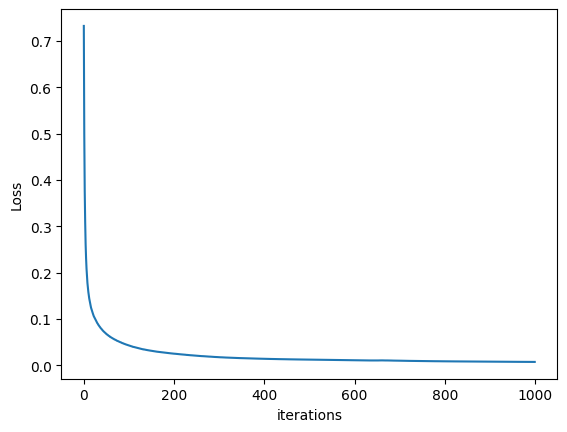

In [15]:
iterations=[i for i in range(1000)]

plt.plot(iterations,results_df_ce["loss_train"])
plt.xlabel("iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Score')

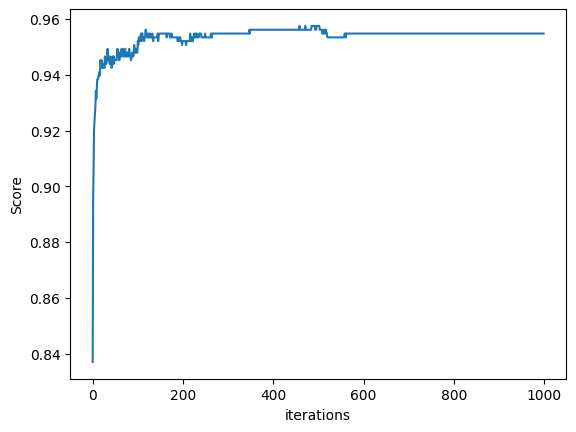

In [17]:
plt.plot(iterations,results_df_mse["score_test"])
plt.xlabel("iterations")
plt.ylabel("Score")